<a href="https://colab.research.google.com/github/nidhi-ilanthalaivan/PMPresentation/blob/main/PMPresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import zipfile
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')
os.system("kaggle datasets download -d nelgiriyewithana/global-weather-repository")


0

In [4]:
import zipfile

zip_file_path = "global-weather-repository.zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("weather_data")

In [5]:
file_path = "weather_data/GlobalWeatherRepository.csv"

weather = pd.read_csv(file_path)


In [6]:
print("Dataset Info:")
print(weather.info())
print("\nPreview:")
print(weather.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47162 entries, 0 to 47161
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       47162 non-null  object 
 1   location_name                 47162 non-null  object 
 2   latitude                      47162 non-null  float64
 3   longitude                     47162 non-null  float64
 4   timezone                      47162 non-null  object 
 5   last_updated_epoch            47162 non-null  int64  
 6   last_updated                  47162 non-null  object 
 7   temperature_celsius           47162 non-null  float64
 8   temperature_fahrenheit        47162 non-null  float64
 9   condition_text                47162 non-null  object 
 10  wind_mph                      47162 non-null  float64
 11  wind_kph                      47162 non-null  float64
 12  wind_degree                   47162 non-null  

In [7]:
print("\nChecking for Missing Values...")
print(weather.isnull().sum())



Checking for Missing Values...
country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozon

In [8]:
weather.fillna(weather.median(numeric_only=True), inplace=True)

In [11]:
scaler = StandardScaler()
numerical_cols = weather.select_dtypes(include=["float64", "int64"]).columns
scaled_data = pd.DataFrame(scaler.fit_transform(weather[numerical_cols]), columns=numerical_cols)
for col in numerical_cols:
    weather[col] = scaled_data[col].astype(float)

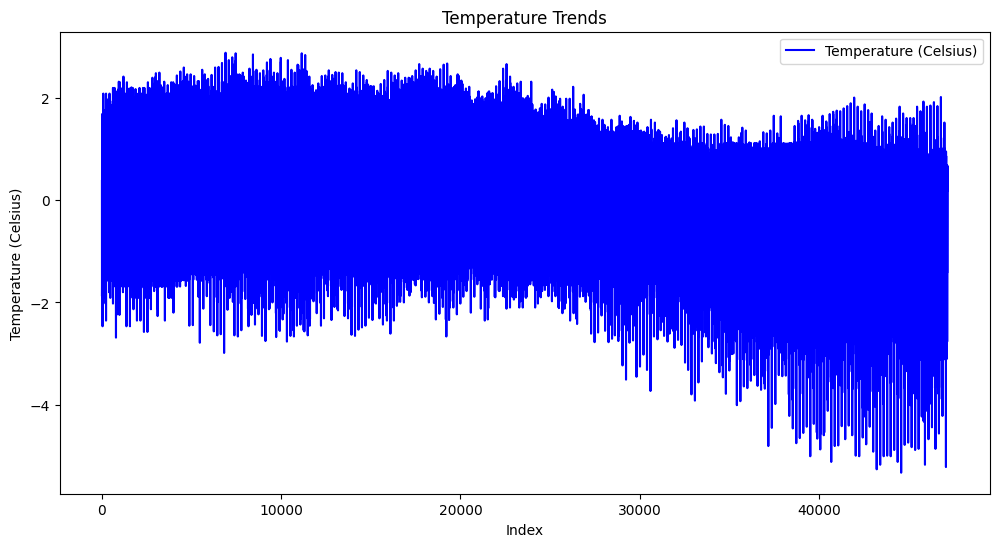

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(weather['temperature_celsius'], label='Temperature (Celsius)', color='blue')
plt.title('Temperature Trends')
plt.xlabel('Index')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

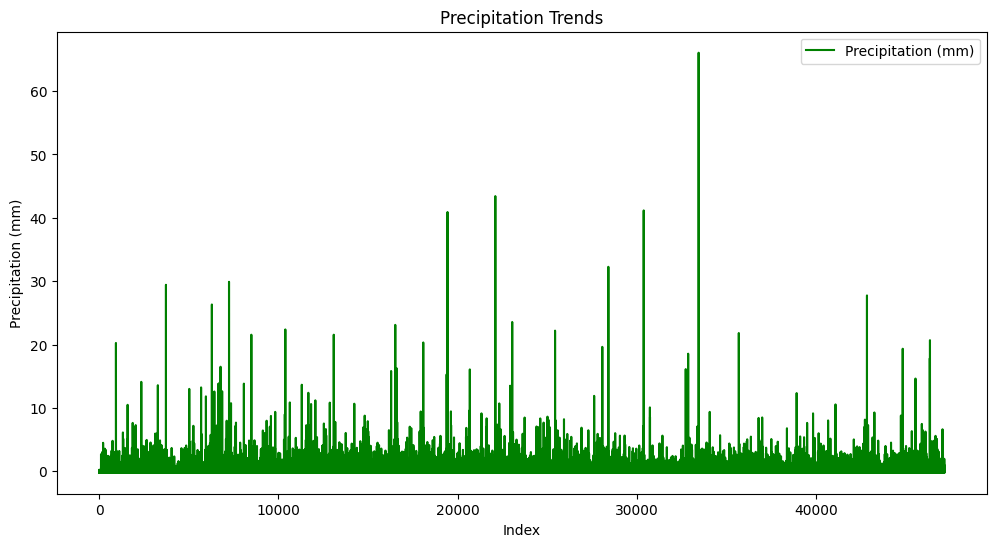

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(weather['precip_mm'], label='Precipitation (mm)', color='green')
plt.title('Precipitation Trends')
plt.xlabel('Index')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

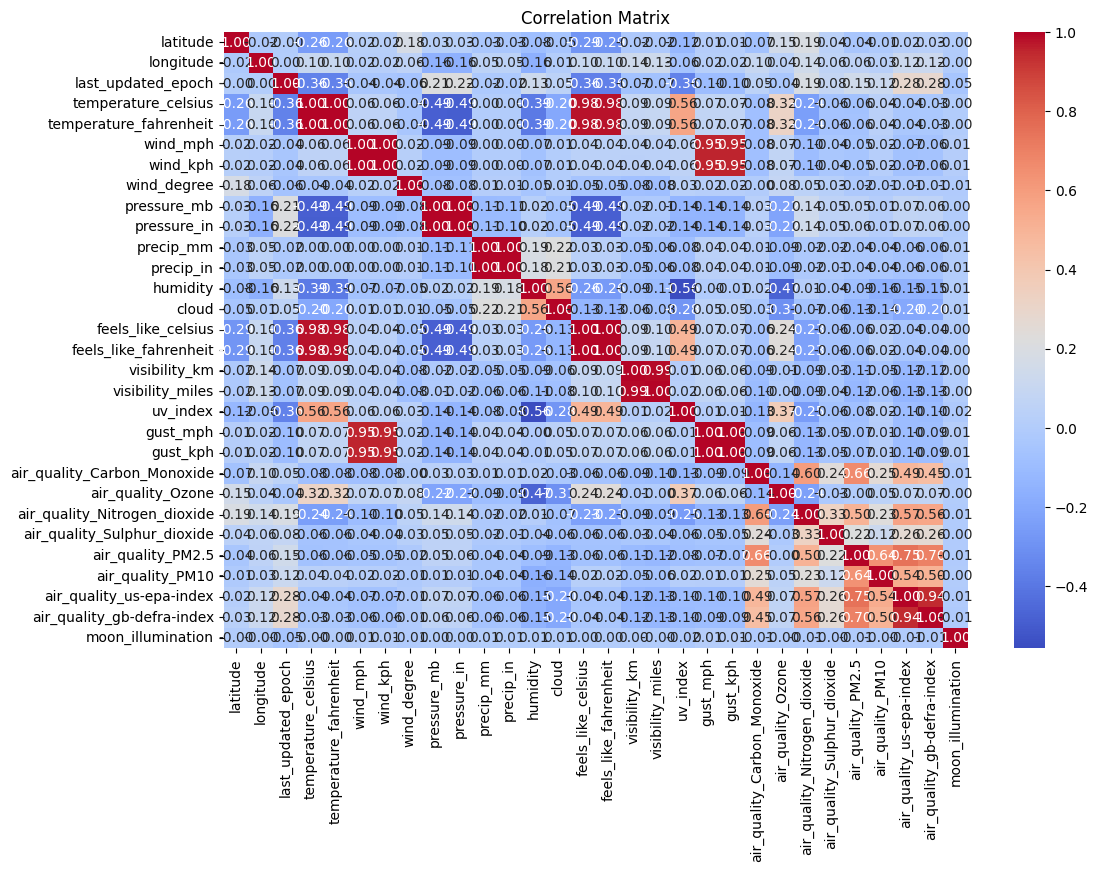

In [14]:
numeric_cols = weather.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = weather[numeric_cols].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [15]:
weather['last_updated'] = pd.to_datetime(weather['last_updated_epoch'], unit='s')
weather.set_index('last_updated', inplace=True)

In [16]:
train = weather[:-365]
test = weather[-365:]


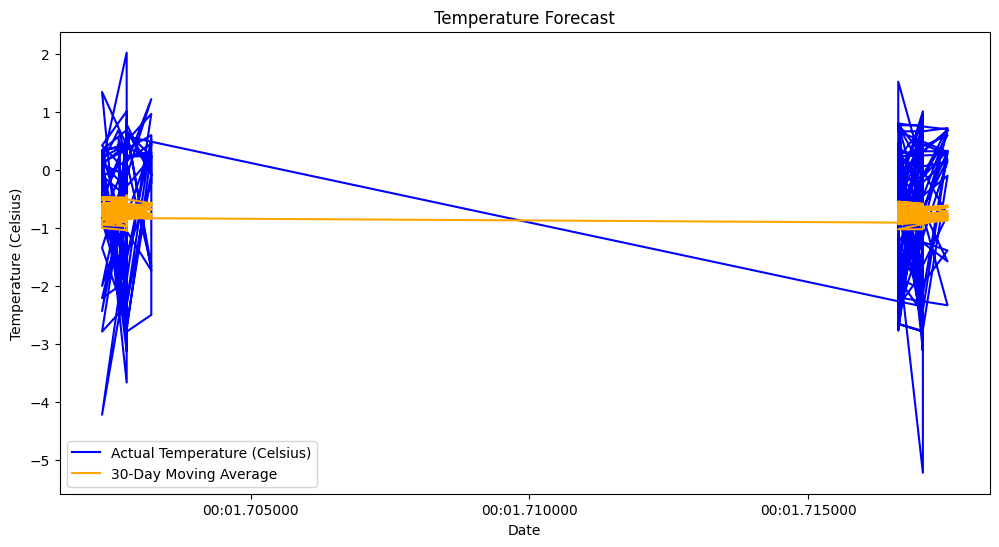

In [18]:

window_size = 30
moving_avg = train['temperature_celsius'].rolling(window=window_size).mean().iloc[-len(test):]


plt.figure(figsize=(12, 6))
plt.plot(test.index, test['temperature_celsius'], label='Actual Temperature (Celsius)', color='blue')
plt.plot(test.index, moving_avg, label=f'{window_size}-Day Moving Average', color='orange')
plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()


In [19]:

mae = mean_absolute_error(test['temperature_celsius'][window_size-1:], moving_avg[window_size-1:])
rmse = np.sqrt(mean_squared_error(test['temperature_celsius'][window_size-1:], moving_avg[window_size-1:]))
print(f"Basic Forecasting Model - MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Basic Forecasting Model - MAE: 1.06, RMSE: 1.23
